## Dataset

https://www.kaggle.com/datasets/ayuraj/asl-dataset

In [1]:
import joblib
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.applications.vgg16 import VGG16
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import Model, Sequential
import os

Load_RF = joblib.load("./VGG16_RandomForest.joblib")

In [2]:
def Feature_Extractor_VGG16(input_shape):
    
    base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    for layer in base.layers:
        layer.trainable = False
    
    output = base.output
    model = Model(inputs=base.input, outputs=output)

    return model

model = Feature_Extractor_VGG16((256,192,3))

In [3]:
Images = []
Labels = [] 

for path in glob.glob("./asl_dataset/*"):
    label = path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(path,"*.jpeg")):
        img = cv2.imread(img_path)       
        img = cv2.resize(img, (192, 256))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = img/255.
        
        Images.append(img)
        Labels.append(label)
        
Images = np.array(Images)
Labels = np.array(Labels)

le = preprocessing.LabelEncoder()
le.fit(Labels)
Labels_encoded = le.transform(Labels)
Labels_one_hot = to_categorical(Labels_encoded)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Images, Labels_one_hot, test_size=0.2)

In [4]:
X_test_extractor = model.predict(X_test)
X_test_features = X_test_extractor.reshape(X_test_extractor.shape[0], -1)
 
prediction_RF = Load_RF.predict(X_test_features)

argmax_prediction_RF=[]
argmax_Y_test=[]

for i in range(len(prediction_RF)):
    argmax_prediction_RF.append(np.argmax(prediction_RF[i]))
    argmax_Y_test.append(np.argmax(Y_test[i]))
    
#Inverse le transform to get original label 
prediction_RF = le.inverse_transform(np.array(argmax_prediction_RF))
Inverse_Y_test = le.inverse_transform(np.array(argmax_Y_test))

# Overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(Inverse_Y_test, prediction_RF))

Accuracy =  0.9821073558648111


original label: t
original label: 9
original label: 0
original label: r
original label: v
original label: y
original label: h
original label: q
original label: s


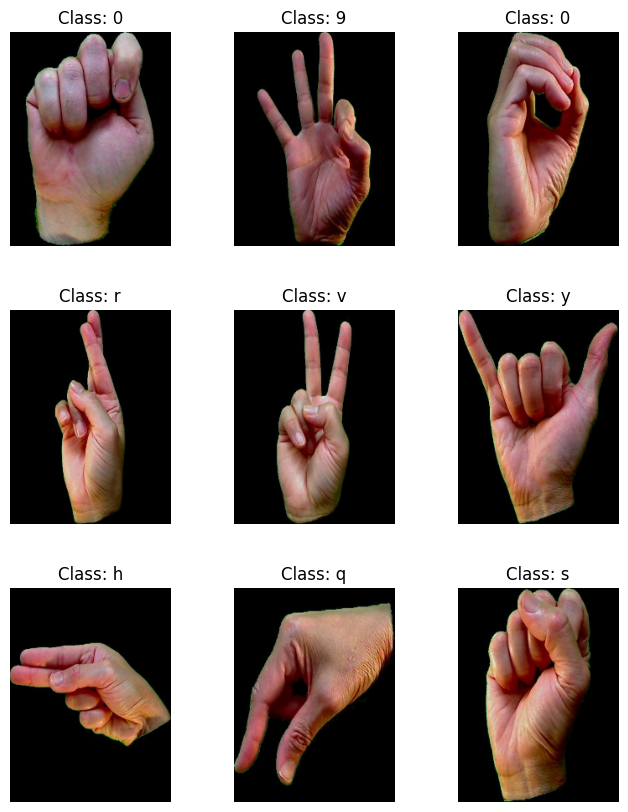

In [5]:
import random
num = random.randint(0, len(X_test))
plt.figure(figsize = (8 , 10))
for i in range(9):
    plt.subplot(3 , 3, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(X_test[num+i, :, :, :])
    plt.title('Class: {}'.format(prediction_RF[num+i]),fontsize = 12)
    print('original label:',Inverse_Y_test[num+i])
    plt.axis('off')